## Import modules

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
pd.set_option('display.max_colwidth', 1000, 'display.max_rows', None, 'display.max_columns', None)

## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('drive/MyDrive/BigMart/Train_preprocessed10.csv')
df.head()

,Unnamed: 0,Item_Weight,Item_Outlet_Sales,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Size_0,Outlet_Size_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,New_Item_Type_0,New_Item_Type_1,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Item_Type_0,Item_Type_1,Item_Type_2,Item_Type_3,Item_Type_4,Item_Type_5,Item_Type_6,Item_Type_7,Item_Type_8,Item_Type_9,Item_Type_10,Item_Type_11,Item_Type_12,Item_Type_13,Item_Type_14,log_Item_Visibility,Type1_Tear1,Type1_Tear2,log_Item_MRP,log_Outlet_Years
0,0,9.30,8.225808,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.015920,1,0,5.524692,2.708050
1,1,5.92,6.096776,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.019095,0,0,3.897299,1.609438
2,2,17.50,7.648868,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.016621,1,0,4.960170,2.708050
3,3,19.20,6.597664,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.064037,0,0,5.210005,2.772589
4,4,8.93,6.903451,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.064037,0,0,4.004810,3.295837


In [ ]:
df = df.drop(['Unnamed: 0'], axis=1)

In [ ]:
## 타겟변수 로그변환 해제
#df['Item_Outlet_Sales'] = np.expm1(df['Item_Outlet_Sales'])

## StandardScaler & PCA

In [ ]:
X = df.drop(columns=['Item_Outlet_Sales'], axis=1)
y = df['Item_Outlet_Sales']

In [ ]:
X.columns

Index(['Item_Weight', 'Item_Fat_Content_0', 'Item_Fat_Content_1',
       'Outlet_Size_0', 'Outlet_Size_1', 'Outlet_Location_Type_0',
       'Outlet_Location_Type_1', 'Outlet_Type_0', 'Outlet_Type_1',
       'Outlet_Type_2', 'New_Item_Type_0', 'New_Item_Type_1', 'Outlet_0',
       'Outlet_1', 'Outlet_2', 'Outlet_3', 'Outlet_4', 'Outlet_5', 'Outlet_6',
       'Outlet_7', 'Outlet_8', 'Item_Type_0', 'Item_Type_1', 'Item_Type_2',
       'Item_Type_3', 'Item_Type_4', 'Item_Type_5', 'Item_Type_6',
       'Item_Type_7', 'Item_Type_8', 'Item_Type_9', 'Item_Type_10',
       'Item_Type_11', 'Item_Type_12', 'Item_Type_13', 'Item_Type_14',
       'log_Item_Visibility', 'Type1_Tear1', 'Type1_Tear2', 'log_Item_MRP',
       'log_Outlet_Years'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler

cont_vars = ['Item_Weight', 'log_Item_Visibility', 'log_Item_MRP', 'log_Outlet_Years']
cat_vars = ['Item_Fat_Content_0',
       'Item_Fat_Content_1', 'Outlet_Size_0', 'Outlet_Size_1',
       'Outlet_Location_Type_0', 'Outlet_Location_Type_1', 'Outlet_Type_0',
       'Outlet_Type_1', 'Outlet_Type_2', 'New_Item_Type_0', 'New_Item_Type_1',
       'Outlet_0', 'Outlet_1', 'Outlet_2', 'Outlet_3', 'Outlet_4', 'Outlet_5',
       'Outlet_6', 'Outlet_7', 'Outlet_8','Item_Type_0', 'Item_Type_1',
       'Item_Type_2', 'Item_Type_3', 'Item_Type_4', 'Item_Type_5',
       'Item_Type_6', 'Item_Type_7', 'Item_Type_8', 'Item_Type_9',
       'Item_Type_10', 'Item_Type_11', 'Item_Type_12', 'Item_Type_13',
       'Item_Type_14', 'Type1_Tear1',
       'Type1_Tear2']
scaler = StandardScaler()
df_cont = pd.DataFrame(scaler.fit_transform(X[cont_vars]), columns = cont_vars)
X_norm = pd.concat([df_cont, X[cat_vars]], axis=1)

X_norm.head()

,Item_Weight,log_Item_Visibility,log_Item_MRP,log_Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Size_0,Outlet_Size_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,New_Item_Type_0,New_Item_Type_1,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Item_Type_0,Item_Type_1,Item_Type_2,Item_Type_3,Item_Type_4,Item_Type_5,Item_Type_6,Item_Type_7,Item_Type_8,Item_Type_9,Item_Type_10,Item_Type_11,Item_Type_12,Item_Type_13,Item_Type_14,Type1_Tear1,Type1_Tear2
0,-0.769779,-1.147747,1.320465,0.132463,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,-1.497484,-1.076209,-1.806429,-1.790133,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.995661,-1.131945,0.235784,0.132463,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,1.361667,-0.063529,0.715820,0.245406,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,-0.849439,-0.063529,-1.599856,1.161102,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
X_norm.shape

(8523, 41)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_norm)
pd.DataFrame(X_reduced).shape

(8523, 18)

In [ ]:
np.sum(pca.explained_variance_ratio_)

0.951405575628109

In [ ]:
X_reduced = pd.DataFrame(X_reduced)

In [ ]:
X_reduced.shape

(8523, 18)

## Model Training

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
def train(model, X, y):
    # train the model
    model.fit(X, y)
    
    # predict the training set
    pred = model.predict(X)
    
    # perform cross-validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    rmse = np.mean(np.sqrt(np.abs(cv_score)))
    
    print("Model Report")
    print("MSE:", cv_score)
    print("RMSE:", rmse)

Model Report
MSE: 0.268555420022544
RMSE: 0.5182233302568923


<Axes: title={'center': 'Model Coefficients'}>

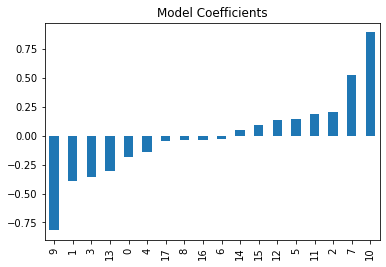

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
model = LinearRegression(fit_intercept=True)
train(model, X_reduced, y)
coef = pd.Series(model.coef_, X_reduced.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

Model Report
MSE: 0.2685555590214225
RMSE: 0.5182234643678559


<Axes: title={'center': 'Model Coefficients'}>

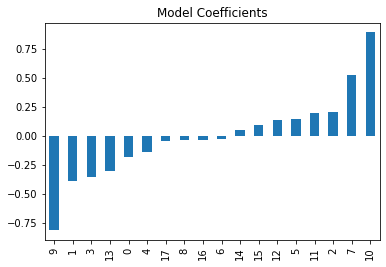

In [ ]:
model = Ridge(alpha=1, max_iter=1000, solver='saga')
train(model, X_reduced, y)
coef = pd.Series(model.coef_, X_reduced.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

Model Report
MSE: 0.26865717412202095
RMSE: 0.5183214968743057


<Axes: title={'center': 'Model Coefficients'}>

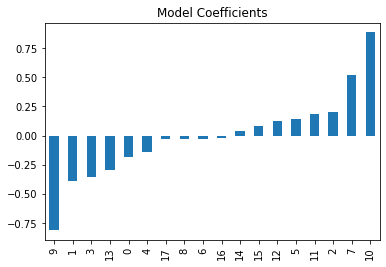

In [ ]:
model = Lasso(alpha=0.001, tol=0.001)
train(model, X_reduced, y)
coef = pd.Series(model.coef_, X_reduced.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

Model Report
MSE: 0.3655069505073008
RMSE: 0.6045717083252414


<Axes: title={'center': 'Feature Importance'}>

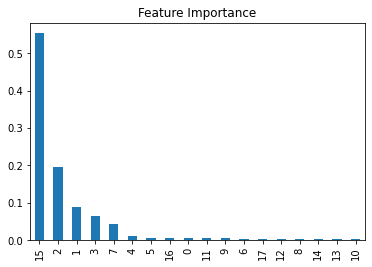

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=10, max_features=20)
train(model, X_reduced, y)
coef = pd.Series(model.feature_importances_, X_reduced.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

Model Report
MSE: 0.288842944831743
RMSE: 0.5374411082451201


<Axes: title={'center': 'Feature Importance'}>

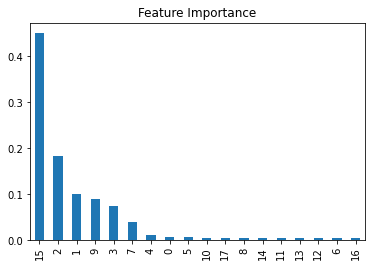

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(bootstrap=True, max_depth=10, max_features=20, n_estimators=200)
train(model, X_reduced, y)
coef = pd.Series(model.feature_importances_, X_reduced.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

In [ ]:
max_depths = []
for i in range(100):
  max_depth = model.estimators_[i].tree_.max_depth
  max_depths.append(max_depth)

print('Average : ', np.mean(max_depths))
print('Max : ', max(max_depths))

Average :  35.59
Max :  44


Model Report
MSE: 0.287407245630355
RMSE: 0.5361037638651263


<Axes: title={'center': 'Feature Importance'}>

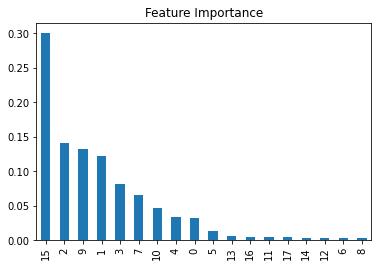

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor(bootstrap=True, max_depth=10, max_features=20, n_estimators=200)
train(model, X_reduced, y)
coef = pd.Series(model.feature_importances_, X_reduced.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

In [ ]:
from sklearn.svm import SVR
model = SVR(C= 0.007, epsilon= 0.003, kernel= 'linear')
train(model, X_reduced, y)

Model Report
MSE: 0.2721903354186538
RMSE: 0.521718636257757


# GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
rf_reg = RandomForestRegressor()
rf_reg.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
param_grid = {
    'n_estimators':[100, 150, 200],
    #'rf_reg__max_features':['auto', 'sqrt', 'log2'],
    'max_depth':[40,50,60]
}

In [ ]:
grid_search = GridSearchCV(rf_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
# scoring=scoring

# Fit the grid search object to the data
grid_search.fit(X_norm, y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [40, 50, 60],
                         'n_estimators': [100, 150, 200]},
             scoring='neg_mean_squared_error')

In [ ]:
model_name = 'RandomForestRegressor'

In [ ]:
results = pd.DataFrame(grid_search.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,4.162827,0.345324,0.054423,0.002723,40,100,"{'max_depth': 40, 'n_estimators': 100}",-0.314246,-0.309066,-0.302230,-0.315046,-0.298153,-0.307748,0.006629,7
1,6.747074,0.878720,0.103024,0.043788,40,150,"{'max_depth': 40, 'n_estimators': 150}",-0.313533,-0.310455,-0.300191,-0.314877,-0.295670,-0.306945,0.007634,3
2,8.296183,0.277091,0.101024,0.002432,40,200,"{'max_depth': 40, 'n_estimators': 200}",-0.311067,-0.311271,-0.301036,-0.314598,-0.296637,-0.306922,0.006862,2
3,4.164578,0.338613,0.052331,0.001936,50,100,"{'max_depth': 50, 'n_estimators': 100}",-0.315763,-0.312828,-0.303123,-0.314199,-0.297429,-0.308668,0.007146,9
4,6.115156,0.081383,0.085149,0.007019,50,150,"{'max_depth': 50, 'n_estimators': 150}",-0.314761,-0.311592,-0.298255,-0.314028,-0.296722,-0.307072,0.007910,4
5,8.349357,0.294774,0.103041,0.008672,50,200,"{'max_depth': 50, 'n_estimators': 200}",-0.313928,-0.312135,-0.299541,-0.311906,-0.297057,-0.306913,0.007112,1
6,3.987000,0.280125,0.052162,0.001004,60,100,"{'max_depth': 60, 'n_estimators': 100}",-0.316425,-0.313091,-0.301564,-0.313701,-0.296646,-0.308286,0.007737,8
7,6.223615,0.371359,0.078388,0.002158,60,150,"{'max_depth': 60, 'n_estimators': 150}",-0.314303,-0.312354,-0.300032,-0.313864,-0.297340,-0.307579,0.007339,6
8,8.144933,0.289278,0.109588,0.010663,60,200,"{'max_depth': 60, 'n_estimators': 200}",-0.314506,-0.311160,-0.302377,-0.312685,-0.296873,-0.307520,0.006761,5


In [ ]:
# Get the best estimator from the grid search
best_estimator = grid_search.best_estimator_
print(best_estimator)

RandomForestRegressor(max_depth=50, n_estimators=200)
